In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle

font = {'weight' : 'bold',
        'size'   : 32}

plt.rc('font', **font)

# Data from US Bureau of Labor Statistics

In [218]:
# put data from text file into pandas dataframe
# table drawn from https://www.bls.gov/web/cewbd/table_f.txt

data = [l.split() for l in open('workforce_by_business_size.txt').readlines()]
data_without_strings = np.array([int(x.replace(',','')) for x in np.array(data[9:37]).flatten()]).reshape(28,10)

categories = ['1 to 4', '5 to 9', '10 to 19', '20 to 49', '50 to 99', '100 to 249', '250 to 499', '500 to 999', '1000+']
n_categories = len(categories)

df = pd.DataFrame(data_without_strings, columns = ['Year']+categories )
df['Sum'] = [ sum([row[c] for c in categories]) for index, row in df.iterrows() ]
print('Distribution of workforce, as sorted by business size')
df

American workforce, as distributed by business size


,Year,1 to 4,5 to 9,10 to 19,20 to 49,50 to 99,100 to 249,250 to 499,500 to 999,1000+,Sum
0,1993,4960,5994,7169,10043,7523,9256,6222,5806,31628,88601
1,1994,5024,6092,7335,10379,7741,9652,6509,6021,32592,91345
2,1995,5097,6180,7505,10681,8076,10059,6809,6291,33957,94655
3,1996,5136,6225,7578,10857,8246,10310,7013,6561,34689,96615
4,1997,5218,6302,7715,11117,8412,10593,7247,6886,36007,99497
5,1998,5241,6315,7780,11230,8541,10838,7464,7134,37783,102326
6,1999,5311,6413,7902,11427,8702,11016,7585,7324,39132,104812
7,2000,5324,6468,8061,11682,8936,11263,7922,7559,40583,107798
8,2001,5346,6450,8069,11698,8922,11398,7907,7620,41246,108656
9,2002,5381,6473,8039,11597,8678,11035,7577,7252,39919,105951


In [219]:
# Second data table
# table drawn from https://www.bls.gov/web/cewbd/table_g.txt
data = [l.split() for l in open('business_size_frequency.txt').readlines()]
data_without_strings = np.array([int(x.replace(',','')) for x in np.array(data[9:37]).flatten()]).reshape(28,10)
df2 = pd.DataFrame(data_without_strings, columns = ['Year']+categories )
df2['Sum'] = [ sum([row[c] for c in categories]) for index, row in df2.iterrows() ]
print('Distribution of business size')
df2

Distribution of business size


,Year,1 to 4,5 to 9,10 to 19,20 to 49,50 to 99,100 to 249,250 to 499,500 to 999,1000+,Sum
0,1993,2311,913,535,334,110,61,18,8,8,4298
1,1994,2344,928,547,345,113,64,19,9,8,4377
2,1995,2382,941,559,355,118,67,20,9,9,4460
3,1996,2407,947,565,360,120,68,20,9,9,4505
4,1997,2453,959,575,369,122,70,21,10,9,4588
5,1998,2468,961,579,373,124,72,22,10,10,4619
6,1999,2510,975,588,379,127,73,22,11,10,4695
7,2000,2516,983,600,388,130,75,23,11,10,4736
8,2001,2534,980,600,388,130,75,23,11,10,4751
9,2002,2554,984,598,385,127,73,22,11,10,4764


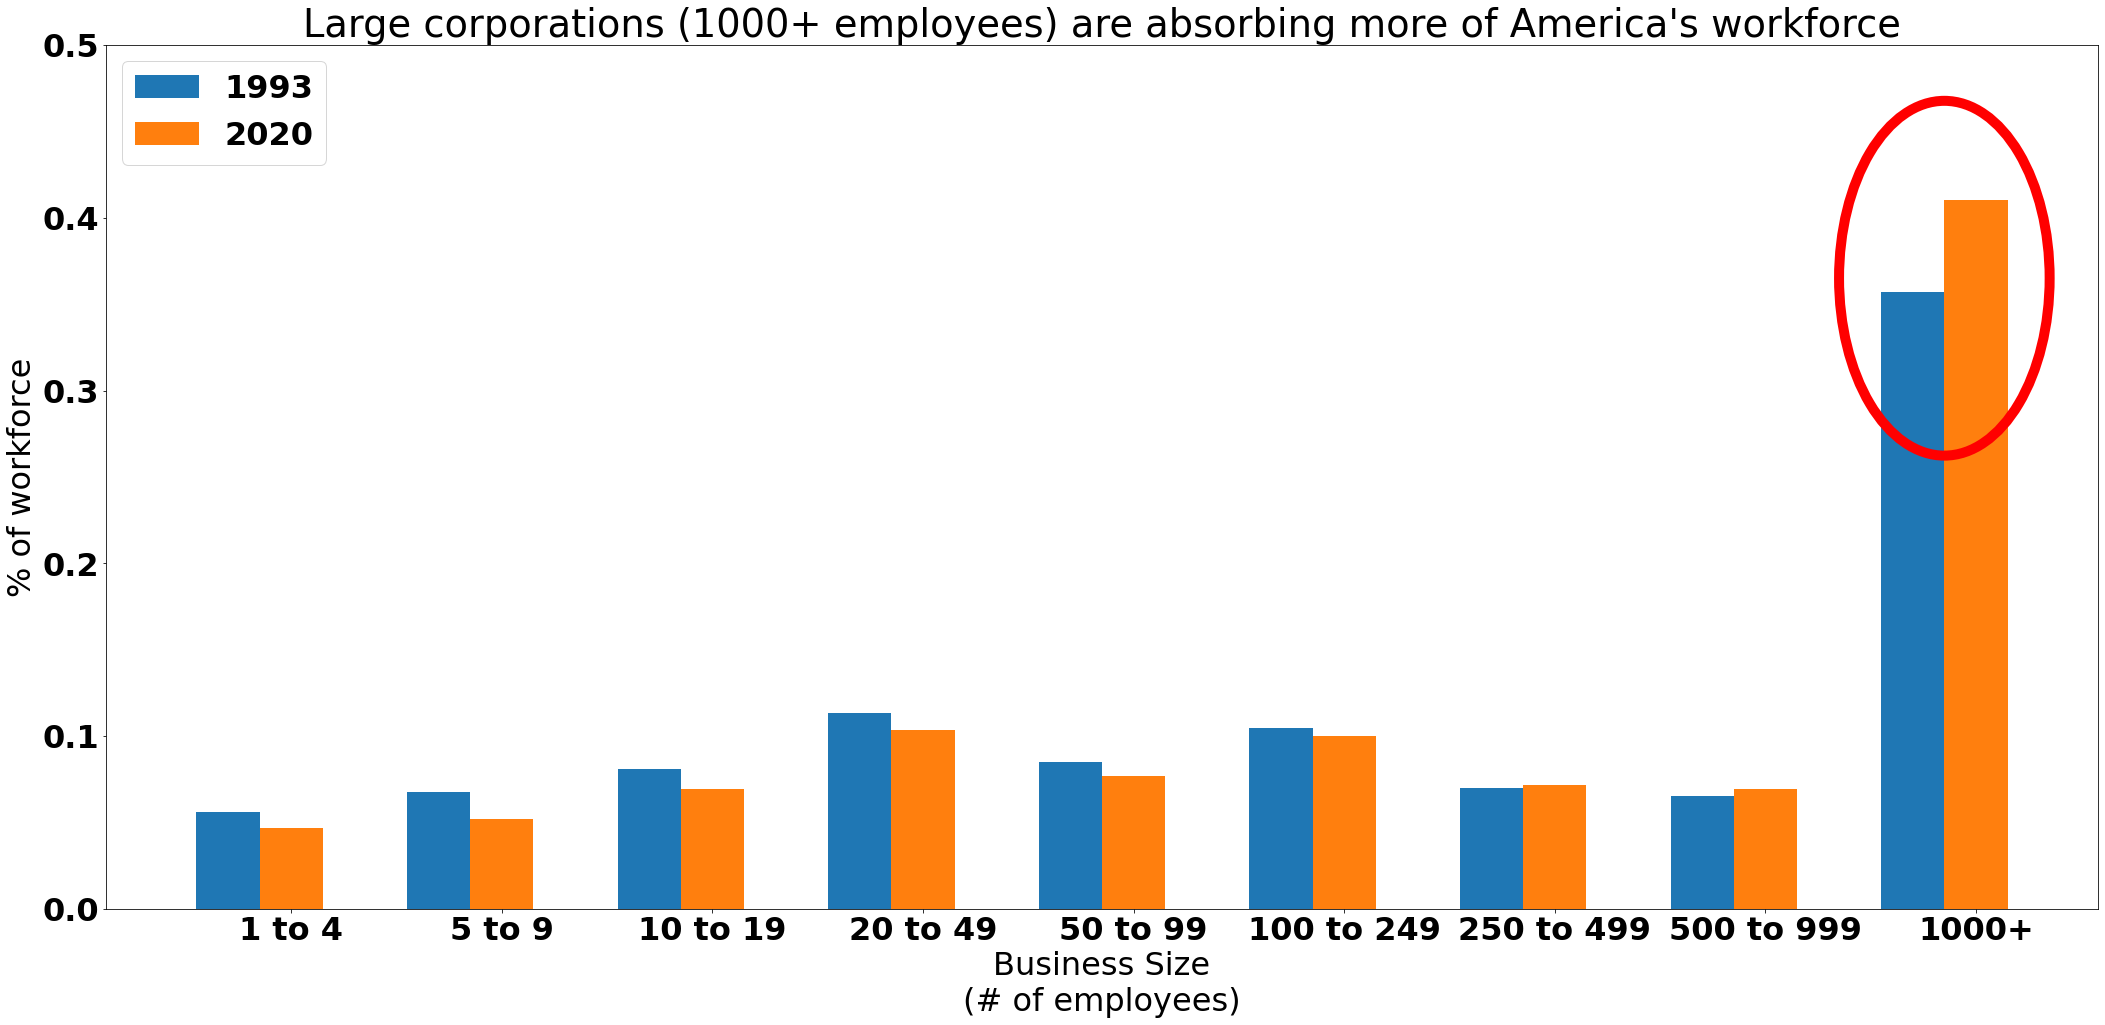

In [258]:
##########
# USER PARAMETERS
##########

years = [1993, 2020]
bar_width = 0.3
title = 'Large corporations (1000+ employees) are absorbing more of America\'s workforce'
x_label = 'Business Size\n(# of employees)'
y_label = '% of workforce'
y_low, y_high = 0, 0.5
##########
#
##########
def plot_data(df_, years, bar_width, title, x_label, y_label = '%', y_low = 0.0, y_high = 1.0, ellipse=False):

    fig, ax = plt.subplots(figsize=(30,15))

    # get normalized data from dataframe
    rows = [df_.loc[df_['Year']==year].drop(['Year','Sum'], axis=1).values.flatten() for year in years]
    normed_rows = [row/sum(row) for row in rows]

    # used to shift columns in the bar graph based on the number of years
    # useful this way so that you can have the list `years`, defined above, be any length >=2
    yearshifts = [i/(len(years)-1)-1 for i in range(len(years))]

    for i, nr in enumerate(normed_rows):
        ax.bar(np.arange(n_categories)+bar_width*yearshifts[i], nr, width=bar_width, label=str(years[i]))

    plt.xticks(np.arange(n_categories), categories)
    ax.set_xlabel(x_label)

    ax.set_ylim([y_low,y_high])
    ax.set_ylabel(y_label)
    
    if ellipse:
    
        # calculate asymmetry of x and y axes:
        x0, y0 = ax.transAxes.transform((0, 0)) # lower left in pixels
        x1, y1 = ax.transAxes.transform((1, 1)) # upper right in pixes
        dx = x1 - x0
        dy = y1 - y0
        maxd = max(dx, dy)
        width = maxd / dx
        height = .1*maxd / dy

        ax.add_artist(Ellipse((7.85, .365), width, height, color='red', fill=False, lw=10))
    
    ax.legend(loc='upper left')
    ax.set_title(title)

    plt.tight_layout()
    plt.show()
    
plot_data(df, years, bar_width, title, x_label, y_label, y_high=0.5, ellipse=True)

# https://www.statista.com/statistics/191750/civilian-labor-force-in-the-us-since-1990/

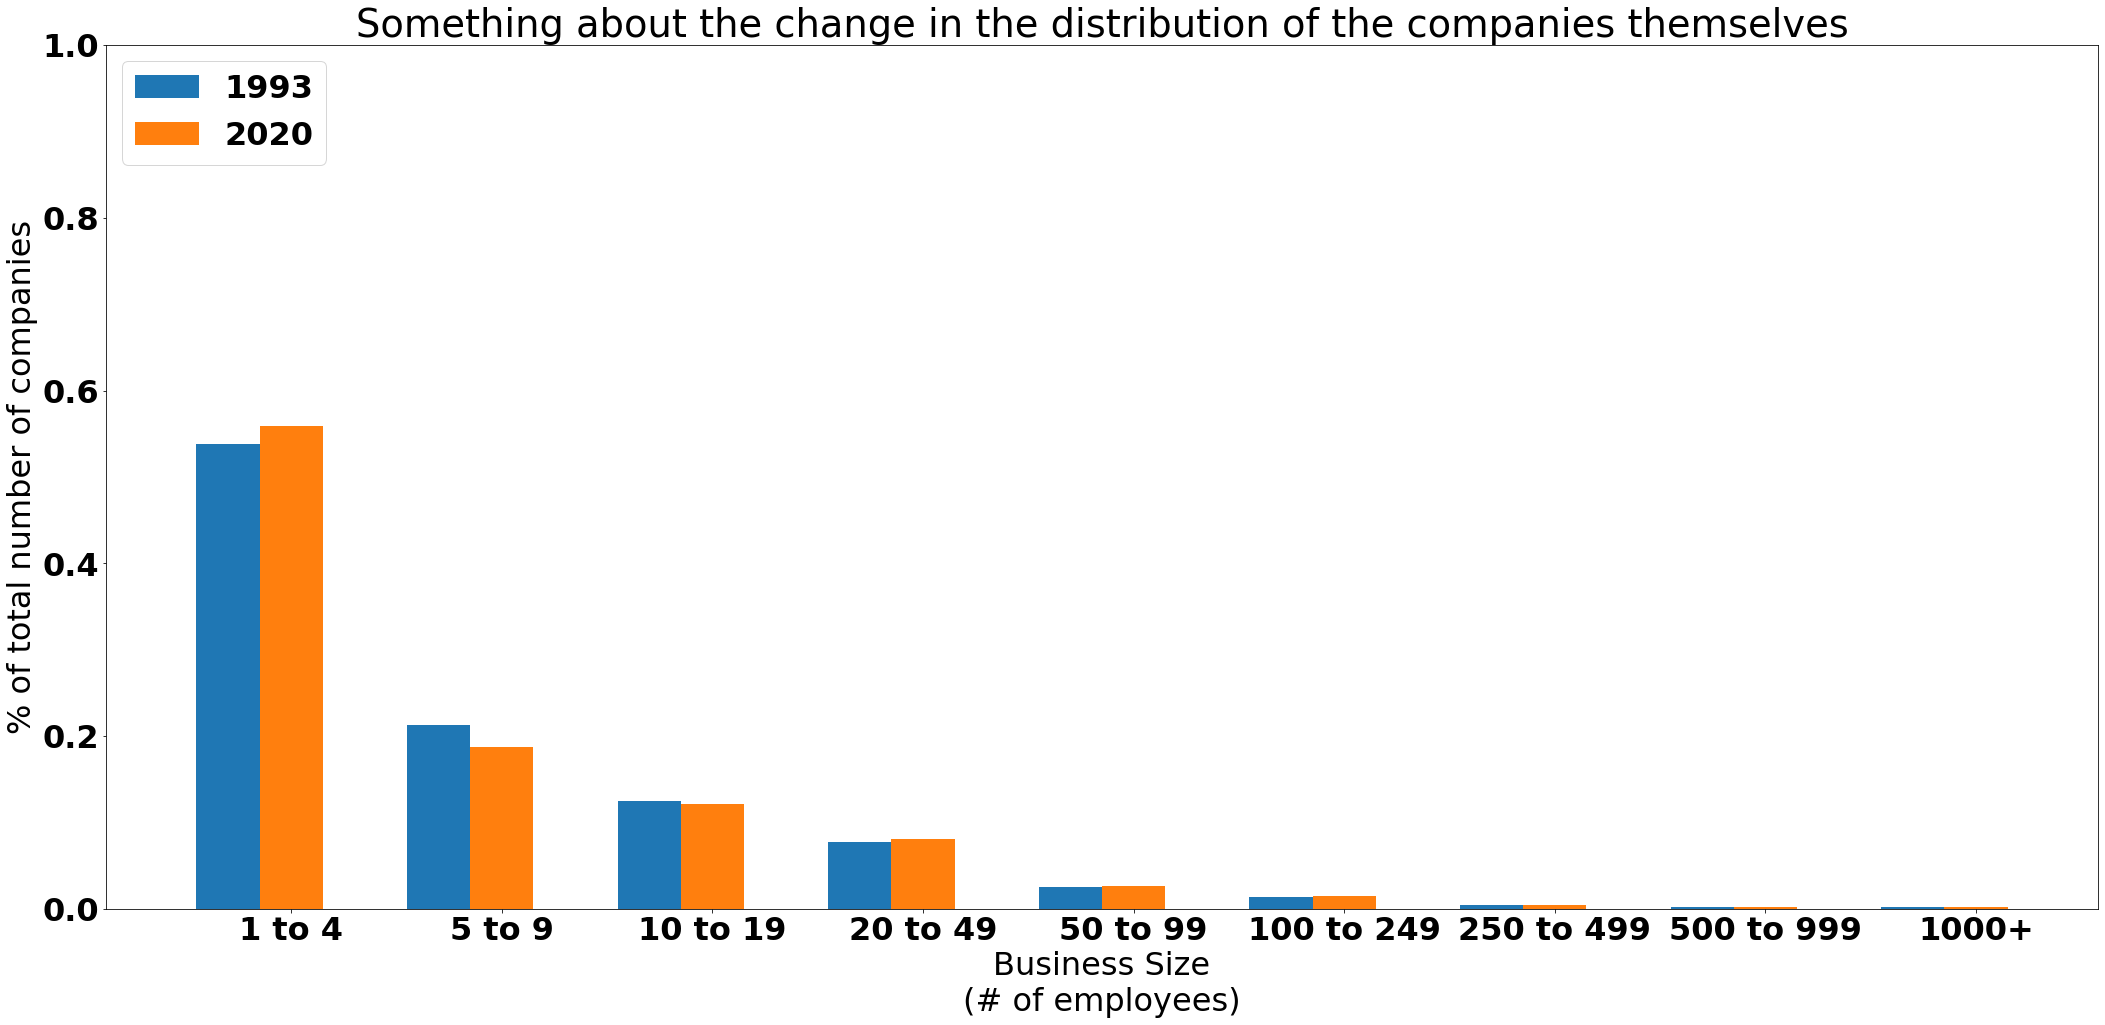

In [257]:
##########
# USER PARAMETERS
##########

years2 = [1993, 2020]
bar_width2 = 0.3
title2 = 'On'
x_label = 'Business Size\n(# of employees)'
y_label2 = '% of total number of companies'
y_low, y_high = 0, 1
##########
#
##########
plot_data(df2, years2, bar_width2, title2, x_label, y_label2)
